<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [70]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE), 'lxml')

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [71]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [72]:
estados_limpos = []

for linha in fonte.find_all('estado'):
    x = []
    for texto in linha:
        x.append(texto.get_text().strip())
      
    try:
        estados = x[3]
        sigla = x[7]
        regiao = x[9]
        estados_limpos.append({'estado': estados, 'sigla': sigla, 'regiao' :regiao})
    except:
        continue
print(estados_limpos)

[{'estado': 'ACRE', 'sigla': 'AC', 'regiao': 'NORTE'}, {'estado': 'ALAGOAS', 'sigla': 'AL', 'regiao': 'NORDESTE'}, {'estado': 'AMAPA', 'sigla': 'AP', 'regiao': 'NORTE'}, {'estado': 'AMAZONAS', 'sigla': 'AM', 'regiao': 'NORTE'}, {'estado': 'BAHIA', 'sigla': 'BA', 'regiao': 'NORDESTE'}, {'estado': 'CEARA', 'sigla': 'CE', 'regiao': 'NORDESTE'}, {'estado': 'DISTRITO FEDERAL', 'sigla': 'DF', 'regiao': 'CENTRO-OESTE'}, {'estado': 'ESPIRITO SANTO', 'sigla': 'ES', 'regiao': 'SUDESTE'}, {'estado': 'GOIAS', 'sigla': 'GO', 'regiao': 'CENTRO-OESTE'}, {'estado': 'MARANHAO', 'sigla': 'MA', 'regiao': 'NORDESTE'}, {'estado': 'MATO GROSSO', 'sigla': 'MT', 'regiao': 'CENTRO-OESTE'}, {'estado': 'MATO GROSSO DO SUL', 'sigla': 'MS', 'regiao': 'CENTRO-OESTE'}, {'estado': 'PARA', 'sigla': 'PA', 'regiao': 'NORTE'}, {'estado': 'PARAIBA', 'sigla': 'PB', 'regiao': 'NORDESTE'}, {'estado': 'PARANA', 'sigla': 'PR', 'regiao': 'SUL'}, {'estado': 'PERNAMBUCO', 'sigla': 'PE', 'regiao': 'NORDESTE'}, {'estado': 'PIAUI', 

In [73]:
import pandas as pd

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

estados_df = pd.DataFrame(estados_limpos)

estados_df.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=";", encoding='utf8')

In [74]:
estados_df

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [75]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv(NOME_ARQUIVO_FONTE)  # continue o codigo aqui

In [76]:
# visualize os resultados
fonte_df
fonte_df.fillna('')
# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [77]:
filtrado_df = fonte_df.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB',  'PIB_percapita']]
filtrado_df['UF'] = filtrado_df['UF'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
filtrado_df
# continue o codigo aqui

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUI,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANA,Planalto,13983,1.385535e+05,9908.709961
5563,SAO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [78]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

filtrado_df.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=';', header=['estado', 'cidade', 'populacao', 'pib', 'pib_percapita'])

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [79]:
import pandas as pd

cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')

brasil_df = pd.merge(left=cidades_df, right=estados_df, on='estado', how='inner')

In [80]:
brasil_df

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5553,AMAPA,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


In [81]:
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
 5   sigla          5555 non-null   object 
 6   regiao         5555 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 347.2+ KB


In [82]:
brasil_df.to_csv('brasil.csv', index=False, sep=';')

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [83]:
import pandas as pd

brasil_df = pd.read_csv('brasil.csv', delimiter=';')
brasil_df

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5553,AMAPA,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [84]:
brasil_df[['cidade', 'populacao']].sort_values(by=['populacao'], ascending=False, ignore_index=True).loc[0:9]

,cidade,populacao
0,São Paulo,11037593
1,Rio de Janeiro,6186710
2,Salvador,2998056
3,Brasília,2606885
4,Fortaleza,2505552
5,Belo Horizonte,2452617
6,Curitiba,1851215
7,Manaus,1738641
8,Recife,1561659
9,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [85]:
nord = brasil_df.query('regiao == "NORDESTE"')
nord[['cidade', 'pib']].sort_values(by=['pib'], ignore_index=True).loc[0:4]         

,cidade,pib
0,Santo Antônio dos Milagres,5770.282227
1,São Miguel da Baixa Grande,7714.598145
2,Quixabá,8294.528320
3,Miguel Leão,8365.680664
4,São Luis do Piauí,8445.269531


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [86]:
sp = brasil_df.query('estado == "SAO PAULO"')
sp[['cidade', 'pib']].sort_values(by=['pib'], ignore_index=True, ascending=False).loc[0:14]      

,cidade,pib
0,São Paulo,389317152.0
1,Guarulhos,32473828.0
2,Campinas,31654720.0
3,Osasco,31616452.0
4,São Bernardo do Campo,28935768.0
5,Barueri,26908070.0
6,Santos,22546134.0
7,São José dos Campos,22018042.0
8,Jundiaí,16585137.0
9,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [87]:
brasil_df.query('estado == "SANTA CATARINA"')['pib'].agg('sum')

129806256.75195317

 - Qual é o população da região sul?

In [88]:
brasil_df.query('regiao == "SUL"')['populacao'].agg('sum')

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [89]:
brasil_df.query('estado == "MATO GROSSO DO SUL"')['pib_percapita'].agg('mean')

14458.896859975644

 - Qual é a população do Brasil?

In [90]:
brasil_df['populacao'].agg('sum')

191176146

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<AxesSubplot: xlabel='cidade'>

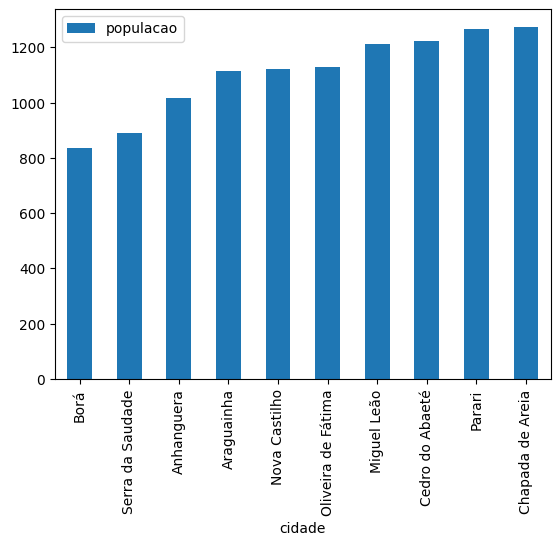

In [91]:
brasil_df[['cidade', 'populacao']].sort_values(by=['populacao'], ignore_index=True).loc[0:9].plot.bar('cidade')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<AxesSubplot: ylabel='populacao'>

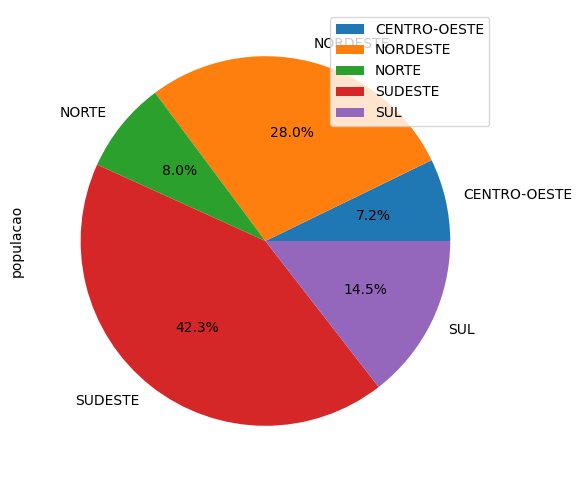

In [92]:
pop = brasil_df[['regiao','populacao']]
gpop = pop.groupby('regiao').agg('sum')
gpop.plot.pie(y='populacao', figsize=(11, 6), autopct='%1.1f%%')